Nombre: Miguel Angel Dominguez Mendoza,
Matrícula: 2085384

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import string
import re

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [15]:
hotel=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Procesamiento_y_Clasificacion_de_Datos/Tarea_2/Data/Hotel_Reviews.csv')

In [16]:
hotel.head(1)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968


In [17]:
# Juntamos la reseña de los puntos positivos del hotel y la reseña de los puntos negativos para tener una sola reseña.
hotel["Review"] = hotel["Negative_Review"] + hotel["Positive_Review"]

In [19]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
hotel['Cleaned Reviews'] = hotel['Review'].apply(clean)
hotel.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review,Cleaned Reviews
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...,I am so angry that i made this post available...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No Negative No real complaints the hotel was g...,No Negative No real complaints the hotel was g...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Rooms are nice but for elderly a bit difficul...,Rooms are nice but for elderly a bit difficul...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,My room was dirty and I was afraid to walk ba...,My room was dirty and I was afraid to walk ba...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,You When I booked with your company on line y...,You When I booked with your company on line y...


In [34]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [20]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

hotel['POS tagged'] = hotel['Cleaned Reviews'].apply(token_stop_pos)
hotel.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review,Cleaned Reviews,POS tagged
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...,I am so angry that i made this post available...,"[(angry, a), (made, v), (post, n), (available,..."
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No Negative No real complaints the hotel was g...,No Negative No real complaints the hotel was g...,"[(Negative, n), (real, a), (complaints, n), (h..."
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Rooms are nice but for elderly a bit difficul...,Rooms are nice but for elderly a bit difficul...,"[(Rooms, n), (nice, a), (elderly, r), (bit, n)..."
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,My room was dirty and I was afraid to walk ba...,My room was dirty and I was afraid to walk ba...,"[(room, n), (dirty, a), (afraid, a), (walk, v)..."
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,You When I booked with your company on line y...,You When I booked with your company on line y...,"[(booked, v), (company, n), (line, n), (showed..."


In [36]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [21]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
hotel['Lemma'] = hotel['POS tagged'].apply(lemmatize)
hotel.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review,Cleaned Reviews,POS tagged,Lemma
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,...,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...,I am so angry that i made this post available...,"[(angry, a), (made, v), (post, n), (available,...",angry make post available via possible site ...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,...,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No Negative No real complaints the hotel was g...,No Negative No real complaints the hotel was g...,"[(Negative, n), (real, a), (complaints, n), (h...",Negative real complaint hotel great great lo...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,...,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Rooms are nice but for elderly a bit difficul...,Rooms are nice but for elderly a bit difficul...,"[(Rooms, n), (nice, a), (elderly, r), (bit, n)...",Rooms nice elderly bit difficult room two st...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,...,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,My room was dirty and I was afraid to walk ba...,My room was dirty and I was afraid to walk ba...,"[(room, n), (dirty, a), (afraid, a), (walk, v)...",room dirty afraid walk barefoot floor look c...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,...,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,You When I booked with your company on line y...,You When I booked with your company on line y...,"[(booked, v), (company, n), (line, n), (showed...",book company line show picture room think ge...


In [22]:
hotel.to_csv('/content/drive/MyDrive/Colab Notebooks/Procesamiento_y_Clasificacion_de_Datos/Tarea_2/Data/Hotel_Reviews_Lematizado.csv',index=False)

In [2]:
%%time
hotel=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Procesamiento_y_Clasificacion_de_Datos/Tarea_2/Data/Hotel_Reviews_Lematizado.csv')

CPU times: user 9.67 s, sys: 1.07 s, total: 10.7 s
Wall time: 11.7 s


Analisis de sentimiento usando TextBlob

In [3]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [4]:
fin_data = hotel[['Review', 'Lemma']]

In [5]:
%%time
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

CPU times: user 2min 9s, sys: 473 ms, total: 2min 10s
Wall time: 2min 11s


In [ ]:
# fin_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Procesamiento_y_Clasificacion_de_Datos/Tarea_2/Data/fin_data.csv',index=False)

In [6]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    418928
Negative     70252
Neutral      26558
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f56c203da90>,
 [Text(-0.9142101246531157, 0.6117351125950959, 'Positive'),
  Text(0.8037395391961449, -0.7510011671980069, 'Negative'),
  Text(1.3323725714185508, -0.21744730610315516, 'Neutral')],
 [Text(-0.4986600679926085, 0.33367369777914324, '81.2%'),
  Text(0.43840338501607906, -0.4096370002898219, '13.6%'),
  Text(0.8389012486709393, -0.13691126680569027, '5.1%')])

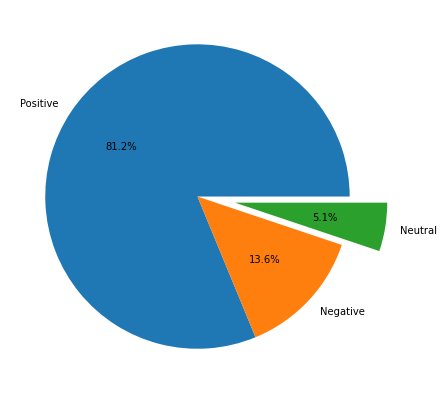

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

Analisis de sentimiento usando VADER

In [8]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 17.4 MB/s 


In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [10]:
%%time
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

CPU times: user 2min 19s, sys: 386 ms, total: 2min 19s
Wall time: 2min 29s


In [11]:
%%time
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

CPU times: user 186 ms, sys: 1.02 ms, total: 187 ms
Wall time: 206 ms


In [12]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    318523
Neutral     167611
Negative     29604
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f56c20594d0>,
 [Text(-0.4333464428541599, 1.1190222788066584, 'Positive'),
  Text(0.20681522564275112, -1.0803830165466033, 'Neutral'),
  Text(1.0821627562669651, -0.19729107670821114, 'Negative')],
 [Text(-0.2527854249982599, 0.6527629959705505, '61.8%'),
  Text(0.11280830489604605, -0.5892998272072382, '32.5%'),
  Text(0.5902705943274354, -0.10761331456811517, '5.7%')])

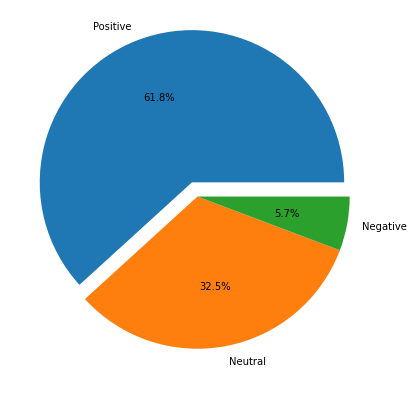

In [13]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

Analisis using SentiWordNet

In [14]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [19]:
%%time
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

CPU times: user 27 µs, sys: 0 ns, total: 27 µs
Wall time: 34.3 µs


In [30]:
import ast

In [32]:
%%time
hotel['POS tagged']=hotel['POS tagged'].apply(ast.literal_eval)

CPU times: user 58.8 s, sys: 3.18 s, total: 1min 1s
Wall time: 1min 2s


In [37]:
%%time
fin_data['SWN analysis'] = hotel['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

CPU times: user 3min 21s, sys: 1.75 s, total: 3min 22s
Wall time: 3min 24s


In [38]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive    307308
Negative    157055
Neutral      49589
0             1786
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f565b79cc50>,
 [Text(-0.35594827423454134, 1.145993379592331, 'Positive'),
  Text(-0.012972248251022132, -1.0999235067836828, 'Negative'),
  Text(1.042826805594836, -0.35001750460922704, 'Neutral'),
  Text(1.0999349003806236, -0.011967243820854588, '0')],
 [Text(-0.2076364933034824, 0.6684961380955262, '59.6%'),
  Text(-0.007075771773284799, -0.5999582764274632, '30.5%'),
  Text(0.5688146212335469, -0.19091863887776017, '9.6%'),
  Text(0.5999644911167037, -0.006527587538647957, '0.3%')])

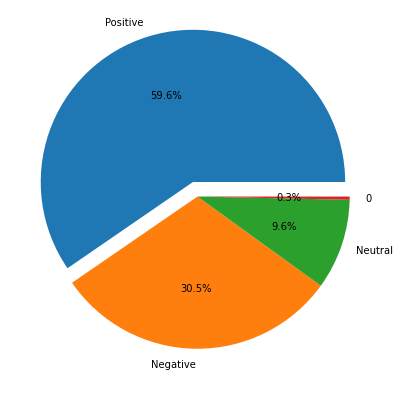

In [40]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0,0), autopct='%1.1f%%', shadow=False)

([<matplotlib.patches.Wedge at 0x7f565b6aa3d0>,
 [Text(-0.32628591804832957, 1.05049393129297, 'Positive'),
  Text(-0.012972248251022132, -1.0999235067836828, 'Negative'),
  Text(1.2798328977754805, -0.42956693747496044, 'Neutral'),
  Text(1.0999349003806236, -0.011967243820854588, '0')],
 [Text(-0.17797413711727064, 0.5729966897961654, '59.6%'),
  Text(-0.007075771773284799, -0.5999582764274632, '30.5%'),
  Text(0.8058207134141914, -0.2704680717434936, '9.6%'),
  Text(0.5999644911167037, -0.006527587538647957, '0.3%')])

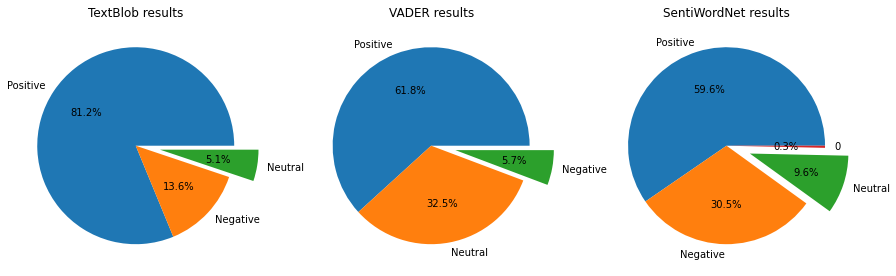

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25,0), autopct='%1.1f%%', shadow=False)

# Analisis de sentimiento con sklearn

### Creamos nuestra variable respuesta en donde

1.   <=6 será negativo
2.   \>6 y <=8 será neutral
3.   \>8 y será positivo



In [3]:
hotel['sentimiento']=np.where(hotel['Reviewer_Score']<=6,0,np.where(hotel['Reviewer_Score']<=8,1,2))

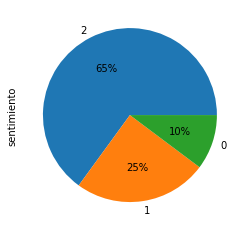

In [4]:
hotel.sentimiento.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [4]:
features = hotel['Review'].values
labels = hotel['sentimiento'].values

In [9]:
%%time
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

CPU times: user 18 s, sys: 198 ms, total: 18.2 s
Wall time: 18.2 s


In [10]:
%%time
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=100, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

CPU times: user 13.5 s, sys: 359 ms, total: 13.9 s
Wall time: 14 s


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [12]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Resultados Train

In [17]:
print(confusion_matrix(y_train,text_classifier.predict(X_train),normalize='true'))
print(classification_report(y_train,text_classifier.predict(X_train)))
print(accuracy_score(y_train, text_classifier.predict(X_train)))

[[0.81180934 0.07977235 0.10841831]
 [0.01019661 0.84533193 0.14447147]
 [0.00280936 0.02247484 0.9747158 ]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.88     42170
           1       0.90      0.85      0.87    102387
           2       0.93      0.97      0.95    268033

    accuracy                           0.93    412590
   macro avg       0.93      0.88      0.90    412590
weighted avg       0.93      0.93      0.92    412590

0.9259579728059333


Resultados Test

In [18]:
print(confusion_matrix(y_test,text_classifier.predict(X_test),normalize='true'))
print(classification_report(y_test,text_classifier.predict(X_test)))
print(accuracy_score(y_test, text_classifier.predict(X_test)))

[[0.26147309 0.35174693 0.38677998]
 [0.06491159 0.28817289 0.64691552]
 [0.01271085 0.0880521  0.89923705]]
              precision    recall  f1-score   support

           0       0.53      0.26      0.35     10590
           1       0.43      0.29      0.35     25450
           2       0.75      0.90      0.82     67108

    accuracy                           0.68    103148
   macro avg       0.57      0.48      0.50    103148
weighted avg       0.65      0.68      0.65    103148

0.6829894908287122
